## Question 1

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from util_func import *

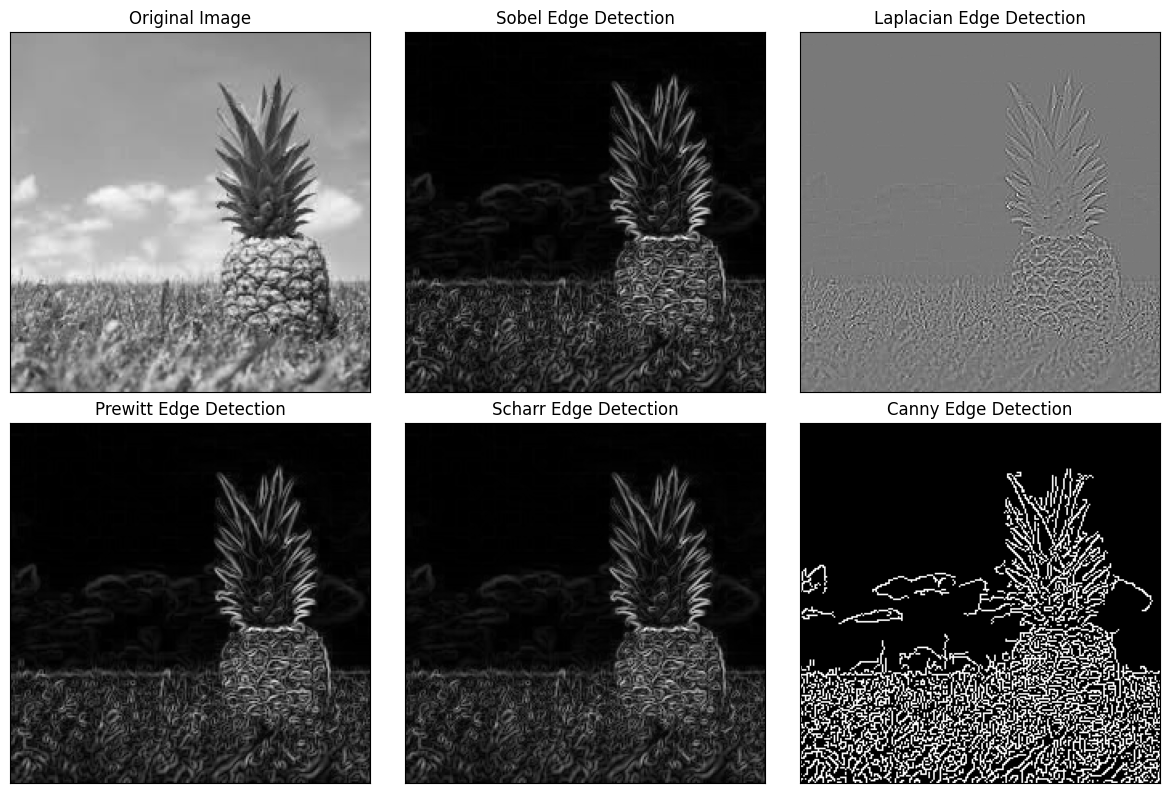

In [3]:
img = cv.imread('images/pineapple.jfif', cv.IMREAD_GRAYSCALE)

sobel_x = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)
sobel_y = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)
sobel = np.sqrt(sobel_x**2 + sobel_y**2)

laplacian = cv.Laplacian(img, cv.CV_64F)

prewitt_x = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)
prewitt_y = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)
prewitt = np.sqrt(prewitt_x**2 + prewitt_y**2)

scharr_x = cv.Scharr(img, cv.CV_64F, 1, 0)
scharr_y = cv.Scharr(img, cv.CV_64F, 0, 1)
scharr = np.sqrt(scharr_x**2 + scharr_y**2)

canny = cv.Canny(img, threshold1=30, threshold2=100)

# Plot the original and edge detection results
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 3, 2), plt.imshow(sobel, cmap='gray')
plt.title('Sobel Edge Detection'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 3, 3), plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian Edge Detection'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 3, 4), plt.imshow(prewitt, cmap='gray')
plt.title('Prewitt Edge Detection'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 3, 5), plt.imshow(scharr, cmap='gray')
plt.title('Scharr Edge Detection'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 3, 6), plt.imshow(canny, cmap='gray')
plt.title('Canny Edge Detection'), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()


#### Comments
- Sobel operator: Emphasize edges and will highlight the outlines of the pineapple and its feature
- Laplacian operator: Enhances areas with sharp change in intensity, making the edges of pineapple and its detail more stand out
- Prewitt operator: Emphasize edges, similar to Sobel
- Scharr operator: Similar with Sobel but with a sharpened edge, revealing the contour and structure of the pineapple
- Canny operator: Outline the distinct edges in the picture

## Question 2

In [4]:
img = cv.imread('images/electronic.jfif')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

_, thresholded = cv.threshold(gray, 200, 255, cv.THRESH_BINARY)

contours, _ = cv.findContours(thresholded, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

for contour in contours:
    area = cv.contourArea(contour)
    if area > 100:  
        x, y, w, h = cv.boundingRect(contour)
        cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

show_img('Identified Object', img)

## Question 3

In [5]:
img = cv.imread('images/clock.jpg', cv.IMREAD_COLOR)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

blurred = cv.GaussianBlur(gray, (5, 5), 0)

edges = cv.Canny(blurred, threshold1=100, threshold2=200)

contours, _ = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

clock_contour = None
max_area = 0
for contour in contours:
    area = cv.contourArea(contour)
    if area > max_area:
        max_area = area
        clock_contour = contour

if clock_contour is not None:
    (x, y), radius = cv.minEnclosingCircle(clock_contour)
    center = (int(x), int(y))
    radius = int(radius)
    
    cv.circle(img, center, radius, (0, 255, 0), 2)

    show_img("isolated clock", img)
else:
    print("Clock contour not found.")